# 1. Analyse de données du Titanic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_excel("005 - titanic3.xls")

In [8]:
data.shape

(1309, 14)

In [9]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [10]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis = 1)

In [15]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [16]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [20]:
# suppression des données manquantes
data = data.dropna(axis = 0)

In [18]:
data.shape

(1046, 4)

In [19]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


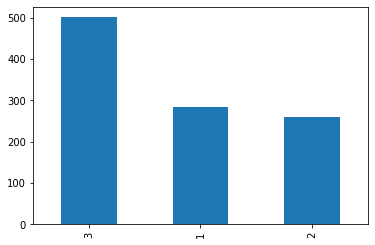

In [22]:
data["pclass"].value_counts().plot.bar()

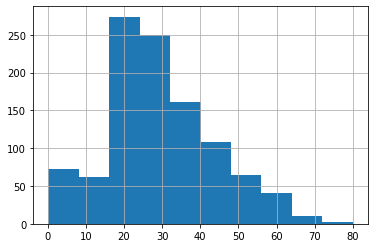

In [23]:
data["age"].hist()

In [26]:
data.groupby(["sex", "pclass"]).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

# 2. Dataframe et séries #

In [42]:
data = pd.read_excel("005 - titanic3.xls")

In [43]:
data = data.drop(['sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis = 1)

In [44]:
data = data.set_index("name")
data["age"]

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
                                                    ...   
Zabour, Miss. Hileni                               14.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          26.5000
Zakarian, Mr. Ortin                                27.0000
Zimmerman, Mr. Leo                                 29.0000
Name: age, Length: 1309, dtype: float64

In [45]:
data["age"][0:10] 

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
Anderson, Mr. Harry                                48.0000
Andrews, Miss. Kornelia Theodosia                  63.0000
Andrews, Mr. Thomas Jr                             39.0000
Appleton, Mrs. Edward Dale (Charlotte Lamson)      53.0000
Artagaveytia, Mr. Ramon                            71.0000
Name: age, dtype: float64

In [46]:
data["age"] < 18

name
Allen, Miss. Elisabeth Walton                      False
Allison, Master. Hudson Trevor                      True
Allison, Miss. Helen Loraine                        True
Allison, Mr. Hudson Joshua Creighton               False
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    False
                                                   ...  
Zabour, Miss. Hileni                                True
Zabour, Miss. Thamine                              False
Zakarian, Mr. Mapriededer                          False
Zakarian, Mr. Ortin                                False
Zimmerman, Mr. Leo                                 False
Name: age, Length: 1309, dtype: bool

In [47]:
data[data["age"] < 18]

,pclass,survived,sex,age
name,,,,
"Allison, Master. Hudson Trevor",1,1,male,0.9167
"Allison, Miss. Helen Loraine",1,0,female,2.0000
"Carrau, Mr. Jose Pedro",1,0,male,17.0000
"Carter, Master. William Thornton II",1,1,male,11.0000
"Carter, Miss. Lucile Polk",1,1,female,14.0000
...,...,...,...,...
"Van Impe, Miss. Catharina",3,0,female,10.0000
"Vander Planke, Mr. Leo Edmondus",3,0,male,16.0000
"Vestrom, Miss. Hulda Amanda Adolfina",3,0,female,14.0000


In [48]:
data[data["age"] < 18]["pclass"].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [49]:
data[data["age"] < 18].groupby(["sex", "pclass"]).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [52]:
data.iloc[0:2, 0:2]

,pclass,survived
name,,
"Allen, Miss. Elisabeth Walton",1,1
"Allison, Master. Hudson Trevor",1,1


In [86]:
data = pd.read_excel("005 - titanic3.xls")

In [87]:
data.loc[0:2, "age"]

0    29.0000
1     0.9167
2     2.0000
Name: age, dtype: float64

In [88]:
data.loc[data["age"] < 20, "age"] = 0
data.loc[(20 <= data["age"]) & (data["age"] < 30), "age"] = 1
data.loc[(30 <= data["age"]) & (data["age"] < 40), "age"] = 2
data.loc[data["age"] >= 40, "age"] = 3

In [151]:
data["age"].value_counts()

1.0    344
3.0    245
2.0    232
0.0    225
Name: age, dtype: int64

In [153]:
data["age"].map(lambda x: x+1)

0       2.0
1       1.0
2       1.0
3       3.0
4       2.0
       ... 
1304    1.0
1305    NaN
1306    2.0
1307    2.0
1308    2.0
Name: age, Length: 1309, dtype: float64

In [154]:
data = pd.read_excel("005 - titanic3.xls")

In [155]:
def category_ages(age):
    if age <= 20:
        return '< 20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '> 40 ans'

In [156]:
data["age"].map(category_ages)

0       20-30 ans
1        < 20 ans
2        < 20 ans
3       20-30 ans
4       20-30 ans
          ...    
1304     < 20 ans
1305     > 40 ans
1306    20-30 ans
1307    20-30 ans
1308    20-30 ans
Name: age, Length: 1309, dtype: object

In [159]:
# data["sex"].map({"male" : 0, "female" : 1})
# data["sex"].replace(["male", "female"], [0, 1])
data["sex"].astype("category").cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Length: 1309, dtype: int8

# 3. Bitcoin #

In [161]:
bitcoin = pd.read_csv("005 - BTC-EUR.csv", index_col = "Date", parse_dates = True)

In [98]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624


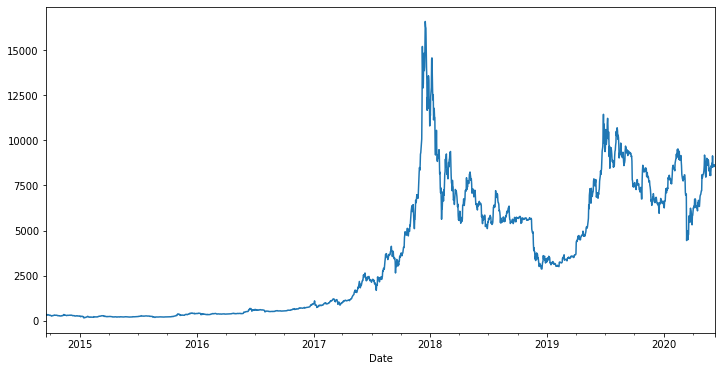

In [99]:
bitcoin["Close"].plot(figsize = (12, 6))
plt.show()

In [100]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
               '2020-06-09', '2020-06-10'],
              dtype='datetime64[ns]', name='Date', length=2094, freq=None)

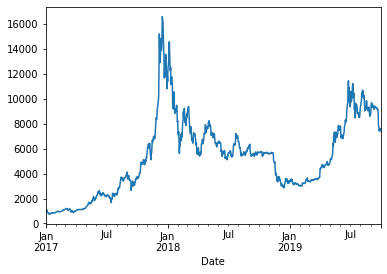

In [104]:
bitcoin["2017":"2019-09"]["Close"].plot()

Date
2019-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2019-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

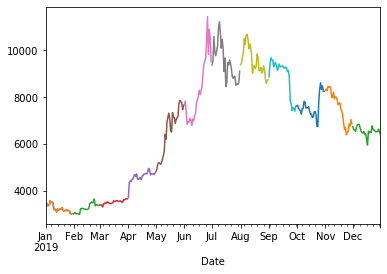

In [106]:
bitcoin.loc["2019", "Close"].resample("M").plot()

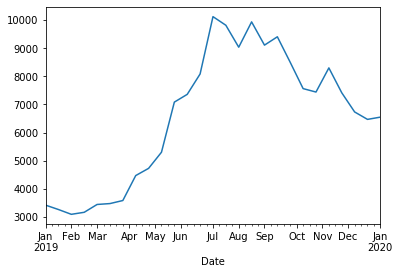

In [109]:
bitcoin.loc["2019", "Close"].resample("2W").mean().plot()

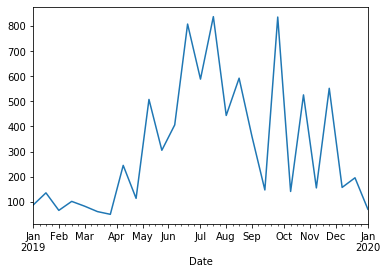

In [110]:
bitcoin.loc["2019", "Close"].resample("2W").std().plot()

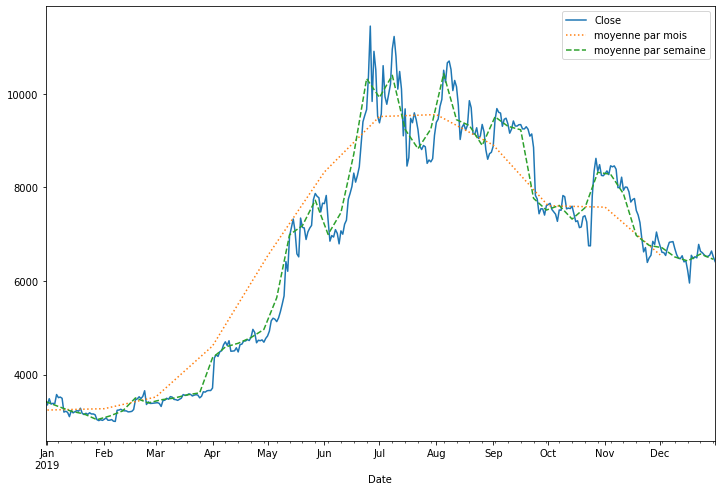

In [112]:
plt.figure(figsize = (12, 8))
bitcoin.loc["2019", "Close"].plot()
bitcoin.loc["2019", "Close"].resample("M").mean().plot(label = "moyenne par mois", ls = ":")
bitcoin.loc["2019", "Close"].resample("W").mean().plot(label = "moyenne par semaine", ls = "--")
plt.legend()
plt.show()

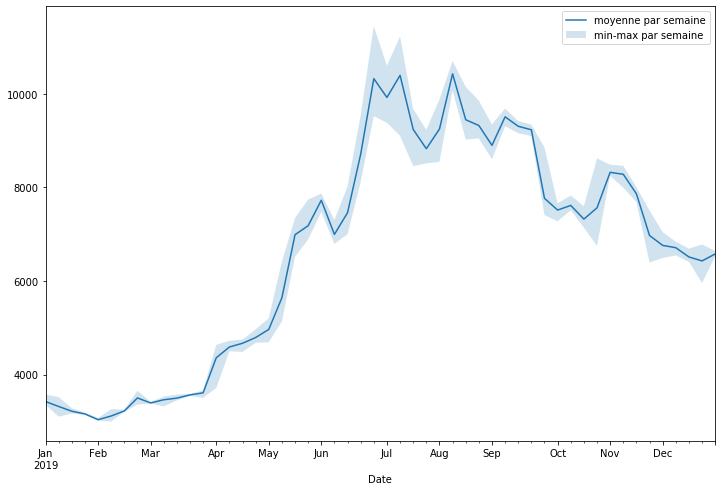

In [117]:
m = bitcoin.loc["2019", "Close"].resample("W").agg(["mean", "std", "min", "max"])

plt.figure(figsize = (12, 8))
m["mean"]["2019"].plot(label = "moyenne par semaine")
plt.fill_between(m.index, m["max"], m["min"], alpha = 0.2, label = "min-max par semaine")

plt.legend()
plt.show()

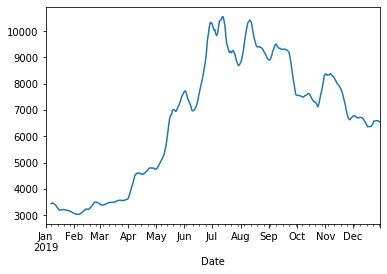

In [120]:
bitcoin.loc["2019", "Close"].rolling(window = 7).mean().plot()

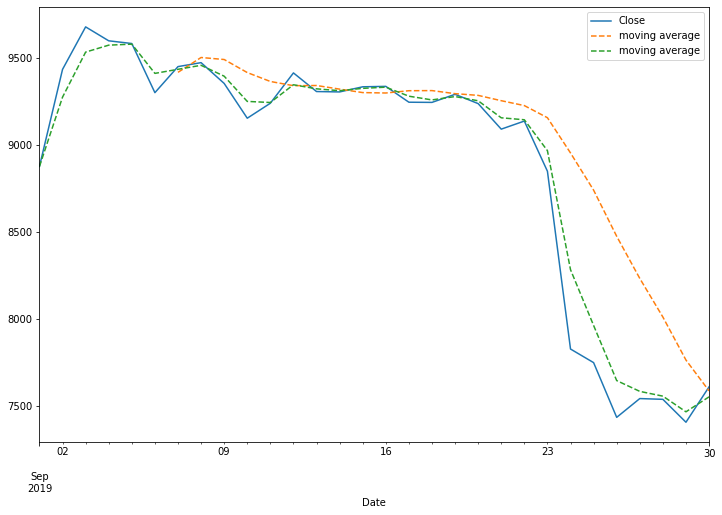

In [125]:
# moyenne mobile centrée vs non-centrée

plt.figure(figsize = (12, 8))
bitcoin.loc["2019-09", "Close"].plot()
bitcoin.loc["2019-09", "Close"].rolling(window = 7).mean().plot(label = "moving average", ls = "--")
bitcoin.loc["2019-09", "Close"].rolling(window = 7, center = True).mean().plot(label = "moving average", ls = "--")
plt.legend()
plt.show()

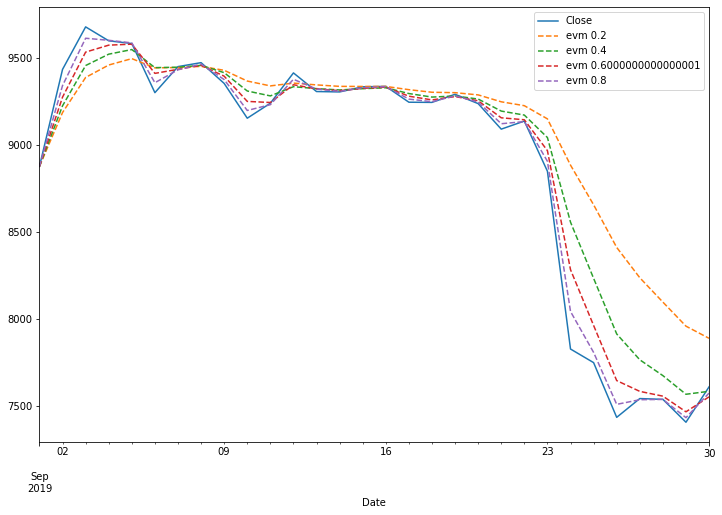

In [129]:
# moyenne mobile exponentielle

plt.figure(figsize = (12, 8))
bitcoin.loc["2019-09", "Close"].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc["2019-09", "Close"].ewm(alpha = i).mean().plot(label = f"evm {i}", ls = "--")
plt.legend()
plt.show()

# 4. Bitcoin VS Ethereum #

In [130]:
ethereum = pd.read_csv("005 - ETH-EUR.csv", index_col = "Date", parse_dates = True)

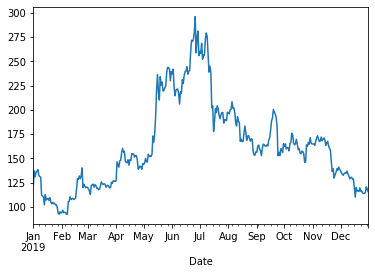

In [132]:
ethereum["2019"]["Close"].plot()

In [139]:
btc_eth = pd.merge(bitcoin, ethereum, on = "Date", how = "outer", suffixes = ("_btc", "_eth"))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000226EC1E1788>,
      dtype=object)

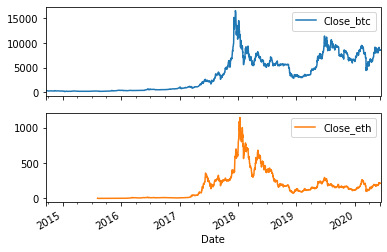

In [143]:
btc_eth[["Close_btc", "Close_eth"]].plot(subplots = True)

In [144]:
btc_eth[["Close_btc", "Close_eth"]].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.722379
Close_eth,0.722379,1.000000


In [164]:
# exercice

data = bitcoin.copy()

data["Buy"] = np.zeros(len(data))
data["Sell"] = np.zeros(len(data))

In [165]:
data["RollingMax"] = data["Close"].shift(1).rolling(window = 28).max()
data["RollingMin"] = data["Close"].shift(1).rolling(window = 28).min()

data.loc[data["Close"] > data["RollingMax"], "Buy"] = 1
data.loc[data["Close"] < data["RollingMin"], "Sell"] = -1

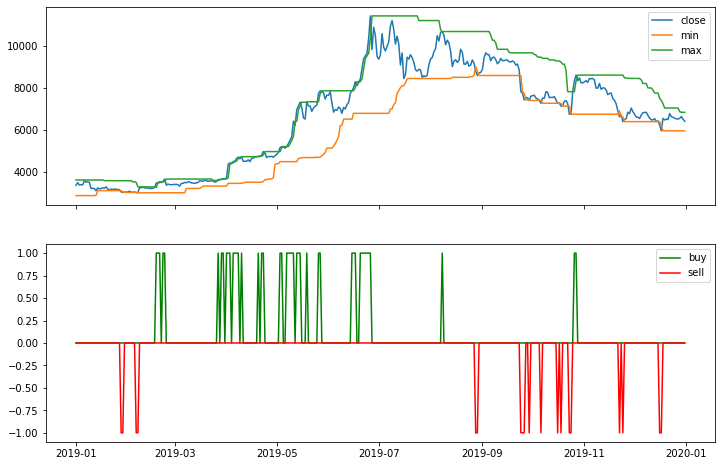

In [166]:
start = "2019"
end = "2019"
fig, ax = plt.subplots(2, figsize=(12, 8), sharex = True)
ax[0].plot(data["Close"][start:end])
ax[0].plot(data["RollingMin"][start:end])
ax[0].plot(data["RollingMax"][start:end])
ax[0].legend(["close", "min", "max"])
ax[1].plot(data["Buy"][start:end], c = "green")
ax[1].plot(data["Sell"][start:end], c = "red")
ax[1].legend(["buy", "sell"])